<a href="https://colab.research.google.com/github/EliFishykins23/Python_Prediction-Models/blob/main/Python_Sample_Reproducibility_Linear_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
New dataset shape: (886, 23)
New Delivery Times: [ 5 10]
Linear Regression Predictions: [3137.16757513 3213.130928  ]
Random Forest Predictions: [1361.25044113 1361.25044113]

Linear Regression:
 Slope: 15.19, Intercept: 3061.20, R^2: 0.049, MSE: 1966989.33
Random Forest Regressor:
 R^2: -0.004, MSE: 2077496.11


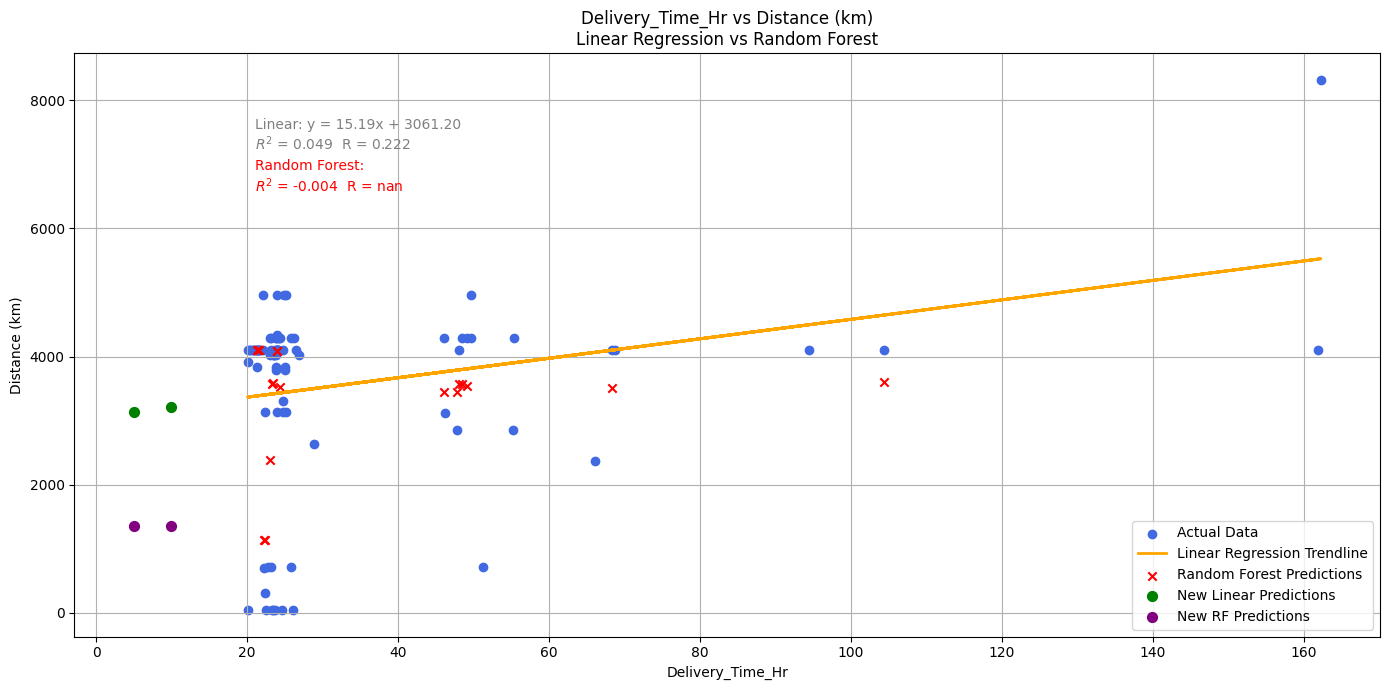

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load Excel
file_path = '/content/drive/My Drive/Data_Anayltics/Simple Linear Regression_Outgoing Deliveries.xlsx'
df = pd.read_excel(file_path)

# X and y
X = df[['Delivery_Time_Hr']]
y = df['Distance (km)']

# Insert Realistic Ranges - [Added]
min_time = X['Delivery_Time_Hr'].min()
max_time = X['Delivery_Time_Hr'].max()

# Fit a Quick Model to get Slope/Intercept for Simulation data n=886 - [Added]
tmp_X = df[['Delivery_Time_Hr']]
tmp_y = df['Distance (km)']

tmp_linreg = LinearRegression()
tmp_linreg.fit(tmp_X, tmp_y)

slope = tmp_linreg.coef_[0]
intercept = tmp_linreg.intercept_

# Simulate 800 New Delivery Times within that Range - [Added]
np.random.seed(42)  # For reproducibility
simulated_times = np.random.uniform(low=min_time, high=max_time, size=800)

# Simulate distances based on your Linear Regression Trend + Noise - [Added]
# Random Noise
simulated_distances = slope * simulated_times + intercept + np.random.normal(scale=y.std() * 0.5, size=800)

# Create DataFrame for Simulation - [Added]
simulated_df = pd.DataFrame({
    'Delivery_Time_Hr': simulated_times,
    'Distance (km)': simulated_distances
})

# Combine Simulation Data with my Original Sample Dataset - [Added]
df = pd.concat([df, simulated_df], ignore_index=True)

print(f"New dataset shape: {df.shape}") # - [Added]

# Split the data (80% Train Test, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

# Random Forest Regressor Model
rfreg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rfreg.fit(X_train, y_train)
y_pred_rf = rfreg.predict(X_test)

# New predictions (example: for 5 and 10 hours) -
# I am asking the model, if my delivery time for (2) samples is '5 or 10 hours', what does the Random Forest expect the (distance)to be?
# These are (2) manual inputs I placed in the model for testing purposes in (purple).
new_times = pd.DataFrame({'Delivery_Time_Hr': [5, 10]})
predicted_distances_lin = linreg.predict(new_times)
predicted_distances_rf = rfreg.predict(new_times)

print("New Delivery Times:", new_times['Delivery_Time_Hr'].values)
print("Linear Regression Predictions:", predicted_distances_lin)
print("Random Forest Predictions:", predicted_distances_rf)

# Metrics for Linear Regression
slope = linreg.coef_[0]
intercept = linreg.intercept_
r2_lin = r2_score(y_test, y_pred_lin)
r_lin = np.sqrt(r2_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Metrics for Random Forest -
r2_rf = r2_score(y_test, y_pred_rf)
r_rf = np.sqrt(r2_rf) if r2_rf >= 0 else float('nan') # - [Added]

# Only sqrt if positive:
r_lin = np.sqrt(r2_lin) if r2_lin >= 0 else float('nan')
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"\nLinear Regression:\n Slope: {slope:.2f}, Intercept: {intercept:.2f}, R^2: {r2_lin:.3f}, MSE: {mse_lin:.2f}")
print(f"Random Forest Regressor:\n R^2: {r2_rf:.3f}, MSE: {mse_rf:.2f}")

# Plot the Data
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='royalblue', label='Actual Data')

# Linear Regression trendline (on whole data for visualization)
y_line = linreg.predict(X)
plt.plot(X, y_line, color='orange', linewidth=2, label='Linear Regression Trendline')

# Random Forest predictions (scatter for test points)
plt.scatter(X_test, y_pred_rf, color='red', label='Random Forest Predictions', marker='x')

# New predictions
plt.scatter(new_times, predicted_distances_lin, color='green', s=50, label='New Linear Predictions')
plt.scatter(new_times, predicted_distances_rf, color='purple', s=50, label='New RF Predictions')

# Safe min/max for plotting text: - (To Prevent Outliers)
x_min = X.min()
if hasattr(x_min, 'iloc'):
    x_min = x_min.iloc[0]

y_max = y.max()
if hasattr(y_max, 'iloc'):
    y_max = y_max.iloc[0]

# Text for Linear Regression
eq_text = f'Linear: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2_lin:.3f}  R = {r_lin:.3f}'
plt.text(x_min + 1, y_max - 1100, eq_text, fontsize=10, color='grey')

# Text for Random Forest
rf_text = f'Random Forest:\n$R^2$ = {r2_rf:.3f}  R = {r_rf:.3f}'
plt.text(x_min + 1, y_max - 1750, rf_text, fontsize=10, color='red')

plt.title('Delivery_Time_Hr vs Distance (km)\nLinear Regression vs Random Forest')
plt.xlabel('Delivery_Time_Hr')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# My dataset has in total n = 86 'actual samples' + 800 simulated samples (Reproduced) for this scenario.
# Factoring in the 20% against my actual dataset of n=886 will produce 177 new RF predictions. "n x 20% Test_Data = 177 RF Predicitions"
